**24/01/2025**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/House Price Prediction Dataset.csv')
df=df.iloc[:,1:]
df

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3592,2,2,3,1938,Downtown,Good,No,266746
3,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056
...,...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,1923,Suburban,Poor,No,295620
1996,3046,5,2,1,2019,Suburban,Poor,Yes,580929
1997,1062,5,1,2,1903,Rural,Poor,No,476925
1998,4062,3,1,2,1936,Urban,Excellent,Yes,161119


In [ ]:
df.columns

Index(['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt', 'Location',
       'Condition', 'Garage', 'Price'],
      dtype='object')

In [ ]:
df.shape

(2000, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Area       2000 non-null   int64 
 1   Bedrooms   2000 non-null   int64 
 2   Bathrooms  2000 non-null   int64 
 3   Floors     2000 non-null   int64 
 4   YearBuilt  2000 non-null   int64 
 5   Location   2000 non-null   object
 6   Condition  2000 non-null   object
 7   Garage     2000 non-null   object
 8   Price      2000 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 140.8+ KB


In [ ]:
df[df.duplicated()]

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price


In [ ]:
df

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3592,2,2,3,1938,Downtown,Good,No,266746
3,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056
...,...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,1923,Suburban,Poor,No,295620
1996,3046,5,2,1,2019,Suburban,Poor,Yes,580929
1997,1062,5,1,2,1903,Rural,Poor,No,476925
1998,4062,3,1,2,1936,Urban,Excellent,Yes,161119


In [ ]:
#make two variable for categorical and numerical column
cat=[]
num=[]
for i in df.columns:
  if df[i].nunique()<=10:
    cat.append(i)
  else:
    num.append(i)

In [ ]:
cat

['Bedrooms', 'Bathrooms', 'Floors', 'Location', 'Condition', 'Garage']

In [ ]:
num

['Area', 'YearBuilt', 'Price']

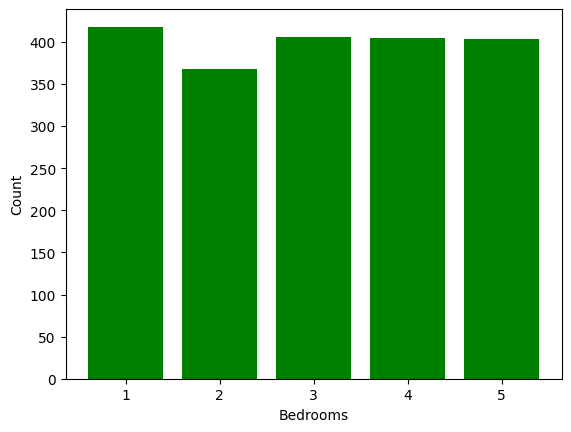

In [ ]:
vc= df['Bedrooms'].value_counts()
plt.bar(vc.index,height=vc,color='g')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
plt.show()

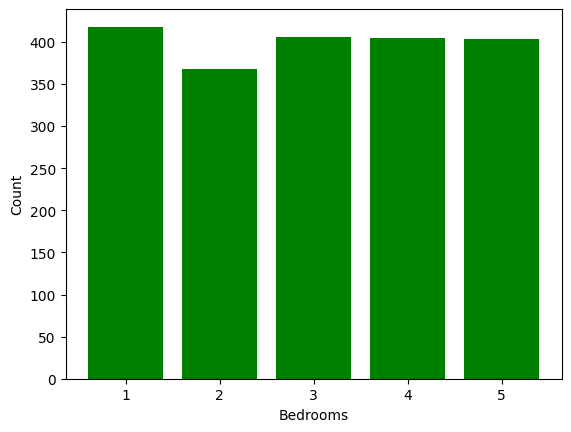

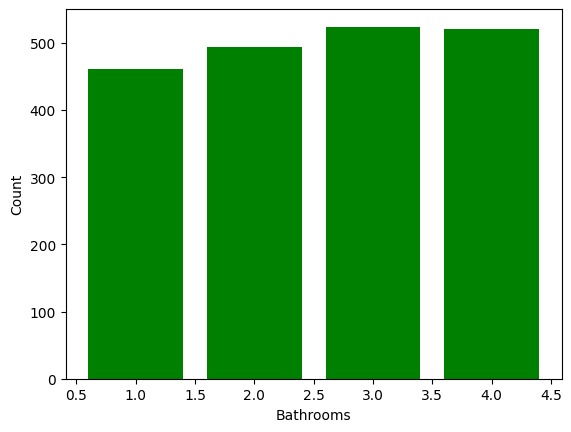

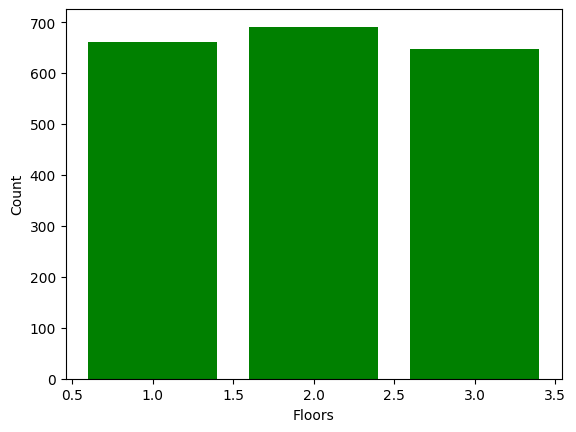

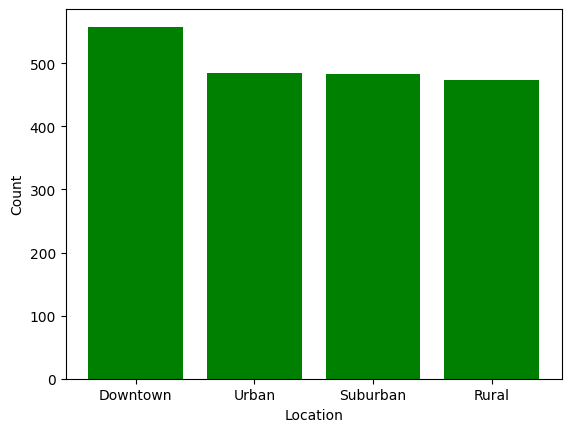

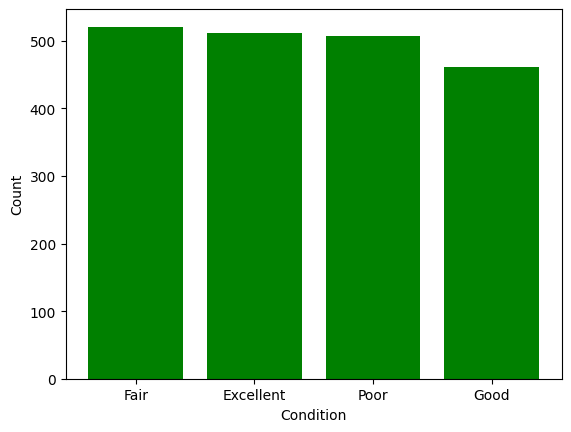

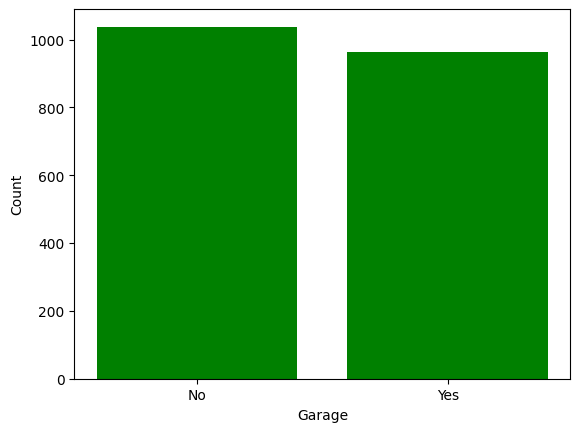

In [ ]:
#for categorical values
for i in cat:
  vc= df[i].value_counts()
  plt.bar(vc.index,height=vc,color='g')
  plt.xlabel(i)
  plt.ylabel('Count')
  plt.show()
  #koi bhi categorical column unbalanced haintho usko drop krna hainn

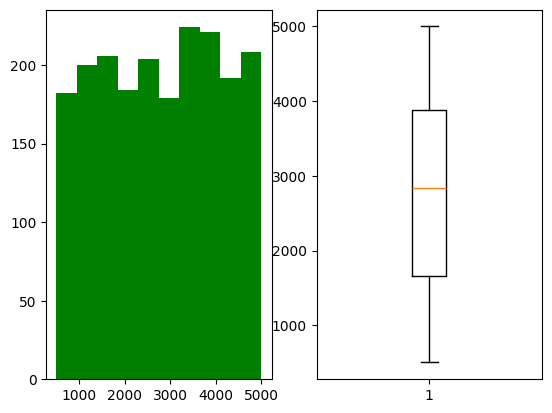

In [ ]:
fig, ax=plt.subplots(1,2)
ax[0].hist(df['Area'],color='g')
ax[1].boxplot(df['Area'])
plt.show()

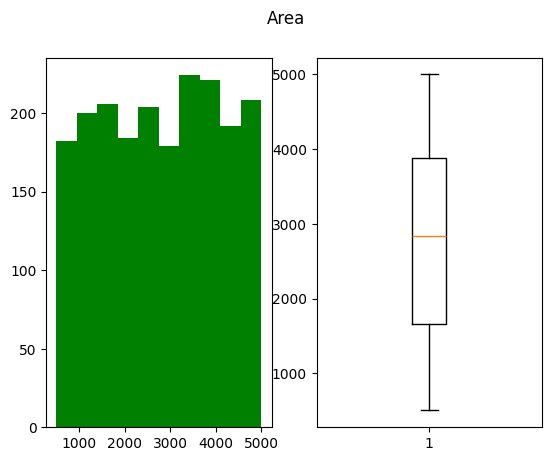

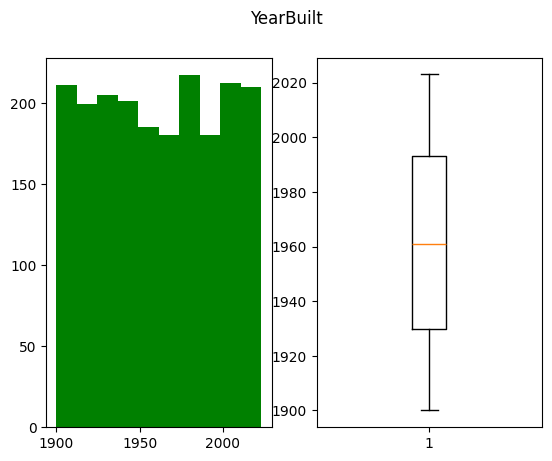

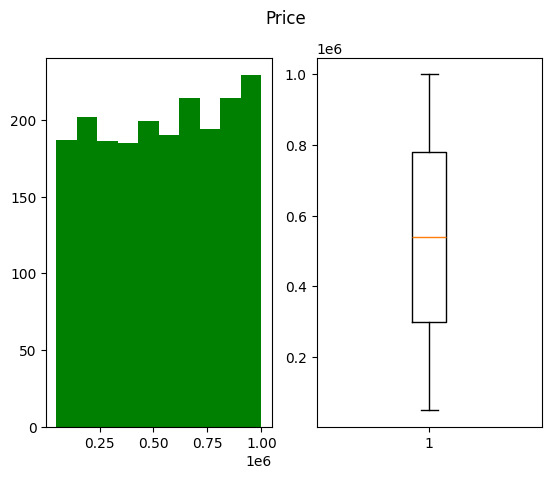

In [ ]:
#for numerical values
for i in num:
  fig, ax=plt.subplots(1,2)
  ax[0].hist(df[i],color='g')
  ax[1].boxplot(df[i])
  plt.suptitle(i)
  plt.show()

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe= OneHotEncoder(sparse_output= False)
locations=ohe.fit_transform(df[['Location']])#only acceptb df
locations

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]])

In [ ]:
df['Location'].nunique()

4

In [ ]:
df

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3592,2,2,3,1938,Downtown,Good,No,266746
3,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056
...,...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,1923,Suburban,Poor,No,295620
1996,3046,5,2,1,2019,Suburban,Poor,Yes,580929
1997,1062,5,1,2,1903,Rural,Poor,No,476925
1998,4062,3,1,2,1936,Urban,Excellent,Yes,161119


In [ ]:
ohe.categories_

[array(['Downtown', 'Rural', 'Suburban', 'Urban'], dtype=object)]

In [ ]:
type(locations)

numpy.ndarray

In [ ]:
locations_df=pd.DataFrame(locations,columns=ohe.categories_)
locations_df=locations_df.iloc[:, 1:]#after one hot coding we have to drop 1 column cause we dont want multicollinearity
locations_df#why dont want multicolinearityw : redunt values example means do cheez ekhi jankari de rhe hain tho ek hi cheez rakho

,Rural,Suburban,Urban
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,1.0,0.0
4,0.0,0.0,0.0
...,...,...,...
1995,0.0,1.0,0.0
1996,0.0,1.0,0.0
1997,1.0,0.0,0.0
1998,0.0,0.0,1.0


In [ ]:
df=pd.concat([df,locations_df] ,axis=1)
df

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price,"(Rural,)","(Suburban,)","(Urban,)"
0,1360,5,4,3,1970,Downtown,Excellent,No,149919,0.0,0.0,0.0
1,4272,5,4,3,1958,Downtown,Excellent,No,424998,0.0,0.0,0.0
2,3592,2,2,3,1938,Downtown,Good,No,266746,0.0,0.0,0.0
3,966,4,2,2,1902,Suburban,Fair,Yes,244020,0.0,1.0,0.0
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,1923,Suburban,Poor,No,295620,0.0,1.0,0.0
1996,3046,5,2,1,2019,Suburban,Poor,Yes,580929,0.0,1.0,0.0
1997,1062,5,1,2,1903,Rural,Poor,No,476925,1.0,0.0,0.0
1998,4062,3,1,2,1936,Urban,Excellent,Yes,161119,0.0,0.0,1.0


In [ ]:
df['Condition'].nunique()

4

In [ ]:
df['Condition'].unique()

array(['Excellent', 'Good', 'Fair', 'Poor'], dtype=object)

In [ ]:
df[['Condition']]=df[['Condition']].replace(to_replace=['Excellent','Good','Fair','Poor'],value=[3,2,1,0])


<ipython-input-30-3eac4ef717c5>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[['Condition']]=df[['Condition']].replace(to_replace=['Excellent','Good','Fair','Poor'],value=[3,2,1,0])


In [ ]:
df

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price,"(Rural,)","(Suburban,)","(Urban,)"
0,1360,5,4,3,1970,Downtown,3,No,149919,0.0,0.0,0.0
1,4272,5,4,3,1958,Downtown,3,No,424998,0.0,0.0,0.0
2,3592,2,2,3,1938,Downtown,2,No,266746,0.0,0.0,0.0
3,966,4,2,2,1902,Suburban,1,Yes,244020,0.0,1.0,0.0
4,4926,1,4,2,1975,Downtown,1,Yes,636056,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,1923,Suburban,0,No,295620,0.0,1.0,0.0
1996,3046,5,2,1,2019,Suburban,0,Yes,580929,0.0,1.0,0.0
1997,1062,5,1,2,1903,Rural,0,No,476925,1.0,0.0,0.0
1998,4062,3,1,2,1936,Urban,3,Yes,161119,0.0,0.0,1.0


In [ ]:
df[['Garage']]=df[['Garage']].replace(to_replace=['Yes','No'],value=[1,0])

<ipython-input-32-5dd4aed19f01>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[['Garage']]=df[['Garage']].replace(to_replace=['Yes','No'],value=[1,0])


In [ ]:
df

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price,"(Rural,)","(Suburban,)","(Urban,)"
0,1360,5,4,3,1970,Downtown,3,0,149919,0.0,0.0,0.0
1,4272,5,4,3,1958,Downtown,3,0,424998,0.0,0.0,0.0
2,3592,2,2,3,1938,Downtown,2,0,266746,0.0,0.0,0.0
3,966,4,2,2,1902,Suburban,1,1,244020,0.0,1.0,0.0
4,4926,1,4,2,1975,Downtown,1,1,636056,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,1923,Suburban,0,0,295620,0.0,1.0,0.0
1996,3046,5,2,1,2019,Suburban,0,1,580929,0.0,1.0,0.0
1997,1062,5,1,2,1903,Rural,0,0,476925,1.0,0.0,0.0
1998,4062,3,1,2,1936,Urban,3,1,161119,0.0,0.0,1.0


In [ ]:

x_df=df.drop(columns=['Price','Location','YearBuilt']) #Independent
y_df=df['Price'] #Dependent data that is going to be predictive
x_df

,Area,Bedrooms,Bathrooms,Floors,Condition,Garage,"(Rural,)","(Suburban,)","(Urban,)"
0,1360,5,4,3,3,0,0.0,0.0,0.0
1,4272,5,4,3,3,0,0.0,0.0,0.0
2,3592,2,2,3,2,0,0.0,0.0,0.0
3,966,4,2,2,1,1,0.0,1.0,0.0
4,4926,1,4,2,1,1,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,0,0,0.0,1.0,0.0
1996,3046,5,2,1,0,1,0.0,1.0,0.0
1997,1062,5,1,2,0,0,1.0,0.0,0.0
1998,4062,3,1,2,3,1,0.0,0.0,1.0


In [ ]:
x=x_df.values
y=y_df.values

In [ ]:
x

array([[1.360e+03, 5.000e+00, 4.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [4.272e+03, 5.000e+00, 4.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [3.592e+03, 2.000e+00, 2.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [1.062e+03, 5.000e+00, 1.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [4.062e+03, 3.000e+00, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [2.989e+03, 5.000e+00, 1.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00]])

In [ ]:
y

array([149919, 424998, 266746, ..., 476925, 161119, 482525])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1600, 9)
(400, 9)
(1600,)
(400,)


In [ ]:
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_train_pred=lr_model.predict(x_train)


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
mse_t=mean_squared_error(y_train_pred,y_train)
rmse_t=mean_squared_error(y_train_pred,y_train)**0.5
mae_t=mean_absolute_error(y_train_pred,y_train)
print(mse_t)
print(rmse_t)
print(mae_t)

77494252799.32251
278377.8956729907
241396.95718603997


In [ ]:
y_test_pred=lr_model.predict(x_test)
mse_test=mean_squared_error(y_test_pred,y_test)
rmse_test=mean_squared_error(y_test_pred,y_test)**0.5
mae_test=mean_absolute_error(y_test_pred,y_test)
print(mse_test)
print(rmse_test)
print(mae_test)

69954923883.05171
264489.93153436243
226122.62877755956


In [ ]:
#ASSUMPTIONS OF LINEAR REGRESSION
    #-MULTICOLINEARITY:Multicollinearity happens when two or more independent variables in a regression model are highly correlated with each other.
    #This means they provide similar information, making it hard to determine the individual effect of each variable on the dependent variable.


    #-linearity: every independent column must have linear relationship with dependent

    #-residuals: error
    #assumption 1 of residul: residuals must have normallity-errors must be normally distribution
    # assumption 2 of residul: no autocorrelation- two rows ke beach autocorr if the error is increasing then it is called autocorrelation

    #-homoscedasticity



In [ ]:
x_df

,Area,Bedrooms,Bathrooms,Floors,Condition,Garage,"(Rural,)","(Suburban,)","(Urban,)"
0,1360,5,4,3,3,0,0.0,0.0,0.0
1,4272,5,4,3,3,0,0.0,0.0,0.0
2,3592,2,2,3,2,0,0.0,0.0,0.0
3,966,4,2,2,1,1,0.0,1.0,0.0
4,4926,1,4,2,1,1,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,0,0,0.0,1.0,0.0
1996,3046,5,2,1,0,1,0.0,1.0,0.0
1997,1062,5,1,2,0,0,1.0,0.0,0.0
1998,4062,3,1,2,3,1,0.0,0.0,1.0


1. Linearity:



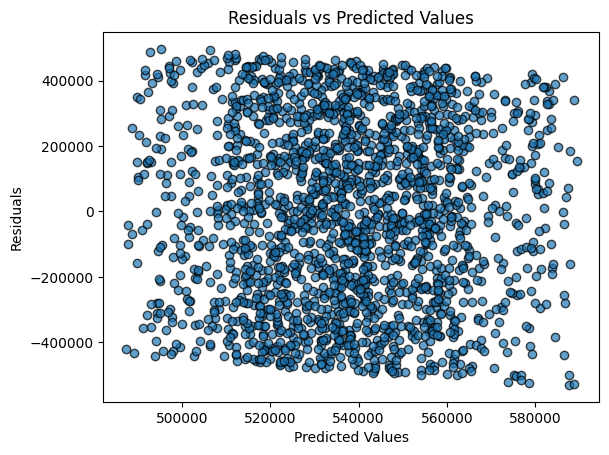

Check if the residuals are randomly scattered around 0. non-random patterns indicate non-linearity horizontal line.
2,Independence of Error(Durbin-Watson Test):

Durbin-Wastson statistic:2.051796704121857
Residuals appear to be independt(No autocorrelation).

3. Homoscedasticity (Breusch-pagan test):

Lagrange Multiplier statistic:14.578904505336165
P-value:0.10317131666799459
Residuals have constant variance (Homoscedasticity).

4. Normality of Errors:



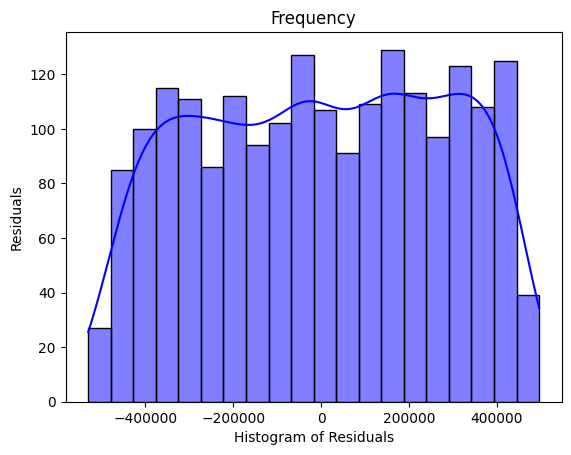

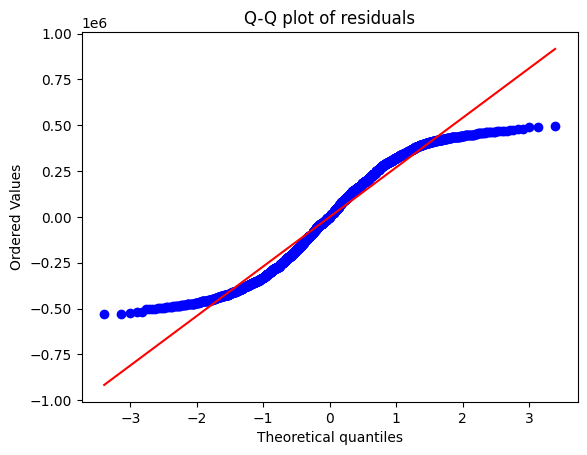

Shapiro-Wilk Test p-value :6.893009544563423e-24
Residuals are not normally distributed.Consider transformation or robust regression.

5. No Multicollinearity (varience Inflation Factor):

      Features       VIF
0         Area  4.799721
1     Bedrooms  4.591665
2    Bathrooms  5.102217
3       Floors  5.570358
4    Condition  2.519510
5       Garage  1.859197
6     (Rural,)  1.717723
7  (Suburban,)  1.740918
8     (Urban,)  1.749181
No significant multicolinearity detected.



In [ ]:
#assumptions of linear regretion
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import shapiro,probplot

def test_linear_regression_assumptions(x,y,x_df):

 """Test the key assumptions of linear regression: Liniarity, Independence, Homoscedasticity, Normality of residuals and No Multicollinearity

    Parameters:
    x (Dataframe): Independent variables
    y (Series): Dependent variables

    Returns:
    None
    """
#Add constant to x for intercept
x= sm.add_constant(x)

#Fit the OLS model
ols_model=sm.OLS(y,x).fit()
residuals= ols_model.resid
predicated_values=ols_model.fittedvalues

#LINEARITY
print("1. Linearity:\n")
plt.scatter(predicated_values,residuals,alpha=0.7,edgecolors='k')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()
print("Check if the residuals are randomly scattered around 0. non-random patterns indicate non-linearity horizontal line.")

#2. no autocorrelation : Independence  of errors
print("2,Independence of Error(Durbin-Watson Test):\n")
dw_stat= durbin_watson(residuals)
print(f"Durbin-Wastson statistic:{dw_stat}")
if 1.5 <= dw_stat <= 2.5:
  print("Residuals appear to be independt(No autocorrelation).\n")
else:
  print("Residuals show autocorrelation . consider adding lag variable or using GLS.\n")

#3. Homoscedasticity
print("3. Homoscedasticity (Breusch-pagan test):\n")
bp_test = het_breuschpagan(residuals,x)
print(f"Lagrange Multiplier statistic:{bp_test[0]}")
print(f"P-value:{bp_test[1]}")
if bp_test[1]>0.05:
  print("Residuals have constant variance (Homoscedasticity).\n")
else:
  print("Residuals have non-constant variance (Heteroscedasticity). consider GLS or transformation. \n")

#4.Normality of errors
print("4. Normality of Errors:\n")
sns.histplot(residuals,kde=True,bins= 20,color='blue')
plt.xlabel('Histogram of Residuals')
plt.ylabel('Residuals')
plt.title('Frequency')
plt.show()
probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q plot of residuals")
plt.show()

shapiro_test=shapiro(residuals)
print(f"Shapiro-Wilk Test p-value :{shapiro_test.pvalue}")
if shapiro_test.pvalue > 0.05:
  print("Residuals are normally distributed.\n")
else:
  print("Residuals are not normally distributed.Consider transformation or robust regression.\n")

#5. No Multicollinearity
print("5. No Multicollinearity (varience Inflation Factor):\n")
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=pd.DataFrame()
vif_data['Features']=x_df.columns
vif_data['VIF']=[variance_inflation_factor(x_df.values, i) for i in range(x_df.shape[1])]
print(vif_data)
if vif_data["VIF"].max()>10:
  print("High multicolinearity detected. consider removing or combing highly correlated variables.\n")
else:
  print("No significant multicolinearity detected.\n")


In [ ]:
test_linear_regression_assumptions(x_train,y_train,x_df)

In [ ]:
#POLYNOMIAL RERGETION

from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly= PolynomialFeatures(degree= 2)
x_poly_train=poly.fit_transform(x_train)
x_poly_test= poly.transform(x_test)


In [ ]:
x_train[0].size

9

In [ ]:
x_poly_train[0].size

55

In [ ]:
poly_model= LinearRegression()
poly_model.fit(x_poly_train, y_train)
y_poly_pred= poly_model.predict(x_poly_train)
y_poly_pred

array([509677.24545672, 553152.0562845 , 459449.1930618 , ...,
       560792.33324102, 510961.46476013, 525356.37580755])

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse_poly_train=mean_squared_error(y_poly_pred, y_train)
rmse_poly_train=mean_squared_error(y_poly_pred, y_train)**0.5
mae_poly_train=mean_absolute_error(y_poly_pred, y_train)
r2_poly_train= r2_score(y_poly_pred, y_train)
print(mse_t)
print(rmse_t)
print(mae_t)
print(r2_poly_train)

77494252799.32251
278377.8956729907
241396.95718603997
-29.878168194087465


In [ ]:
y_poly_test_pred= poly_model.predict(x_poly_test)
mse_test=mean_squared_error(y_poly_test_pred, y_test)
rmse_test=mean_squared_error(y_poly_pred, y_train)**0.5
mae_test=mean_absolute_error(y_poly_test_pred, y_test)
r2_poly_train= r2_score(y_poly_test_pred, y_test)

print(mse_test)
print(rmse_test)
print(mae_test)
print(r2_poly_train)

70516519055.652
274800.3593513366
225094.6393190198
-28.128898116663407


In [ ]:
# Regularization : Lasso or L1 (It reduce the importance of features and adds an error)
# Lasso = Cost Function + Lambda * (bi**2)
# Linear Regularization y = b0 + b1x1 + b2x2 + b3x3

from sklearn.linear_model import Lasso, Ridge, ElasticNet

l1 = Lasso(alpha= 1.0)
l1.fit(x_train, y_train)
y_pred_train_l1= l1.predict(x_train)

mse_l1_train =mean_squared_error(y_pred_train_l1, y_train)
rmse_l1_train =mean_squared_error(y_pred_train_l1, y_train)**0.5
mae_l1_train =mean_absolute_error(y_pred_train_l1, y_train)
r2_l1_train =r2_score(y_train,y_pred_train_l1)
print(mse_l1_train)
print(rmse_l1_train)
print(mae_l1_train)
print(r2_l1_train)

77494252822.10141
278377.89571390435
241396.9961999459
0.0059846901824189835


In [ ]:
# Ridge = Cost Function + Lambda * (bi)
# It eliminates the least important of features.
from sklearn.linear_model import Lasso, Ridge, ElasticNet

l2 = Ridge(alpha= 1.0)
l2.fit(x_train, y_train)
y_pred_train_l2= l2.predict(x_train)

mse_l2_train =mean_squared_error(y_pred_train_l2, y_train)
rmse_l2_train =mean_squared_error(y_pred_train_l2, y_train)**0.5
mae_l2_train =mean_absolute_error(y_pred_train_l2, y_train)
r2_l2_train =r2_score(y_train,y_pred_train_l2 )
print(mse_l2_train)
print(rmse_l2_train)
print(mae_l2_train)
print(r2_l2_train)

77494254727.33202
278377.8991359264
241398.14374459587
0.005984665744111273


In [ ]:
# ElasticNet : It is the combination of Lasso and Ridge.
from sklearn.linear_model import Lasso, Ridge, ElasticNet

l3 = ElasticNet(alpha= 1.0, l1_ratio = 0.6)
l3.fit(x_train, y_train)
y_pred_train_l3= l3.predict(x_train)

mse_l3_train =mean_squared_error(y_pred_train_l3, y_train)
rmse_l3_train =mean_squared_error(y_pred_train_l3, y_train)**0.5
mae_l3_train =mean_absolute_error(y_pred_train_l3, y_train)
r2_l3_train =r2_score(y_train,y_pred_train_l3)
print(mse_l3_train)
print(rmse_l3_train)
print(mae_l3_train)
print(r2_l3_train)

77617751713.03175
278599.62618968415
241850.70577250142
0.00440057544023198


In [ ]:
#knn regressor fast algo comapre to others
from sklearn.neighbors import KNeighborsRegressor
knn_r=KNeighborsRegressor(n_neighbors=5)
knn_r.fit(x_train,y_train)
y_train_knn=knn_r.predict(x_train)

mse_knn_train=mean_squared_error(y_train_knn,y_train)
rmse_l1_train =mean_squared_error(y_train_knn, y_train)**0.5
mae_knn_train =mean_absolute_error(y_train_knn, y_train)
r2_knn_train =r2_score(y_train,y_train_knn)
print(mse_knn_train)
print(rmse_l1_train)
print(mae_knn_train)
print(r2_knn_train)


63546039977.842834
252083.39885411502
212564.639875
0.1848977915657647


In [ ]:
#SVR(support vector regression) generaaly not used
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
y_train_svr=svr.predict(x_train)

mse_svr_train=mean_squared_error(y_train_svr,y_train)
rmse_svr_train =mean_squared_error(y_train_svr, y_train)**0.5
mae_svr_train =mean_absolute_error(y_train_svr, y_train)
r2_svr_train =r2_score(y_train,y_train_svr)
print(mse_svr_train)
print(rmse_svr_train)
print(mae_svr_train)
print(r2_svr_train)

77976568856.89786
279242.84924935474
242440.23364388582
-0.00020195599195949043


In [ ]:
#Decision tree regressor
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(max_depth=20, random_state=0)
dt.fit(x_train,y_train)
y_train_dt=dt.predict(x_train)

mse_dtree_train=mean_squared_error(y_train_dt,y_train)
rmse_dtree_train =mean_squared_error(y_train_dt, y_train)**0.5
mae_dtree_train =mean_absolute_error(y_train_dt, y_train)
r2_dtree_train =r2_score(y_train,y_train_dt)
print(mse_dtree_train)
print(rmse_dtree_train)
print(mae_dtree_train)
print(r2_dtree_train)

11772958974.510872
108503.26711445546
39354.93590104167
0.8489887825696858


In [ ]:
#random forest regressor
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(max_depth=20,n_estimators=100,random_state=0)
rf.fit(x_train,y_train)
y_train_rf=rf.predict(x_train)

mse_rf_train=mean_squared_error(y
